In [1]:
#programos como se estivesse em um ambiente de desenvolvimento.
import pandas as pd # biblioteca para análise de dados em python
import matplotlib.pyplot as plt # biblioteca para plotar gráficos
#import seaborn as sns #biblioteca para auxilio na visualização dos dados
import json
#sns.set(style="darkgrid")
df = pd.read_csv('posts_details_bolsonaro.tsv', '\t') # le o arquivo - separador é o \t
df.head() # exibe as primeiras 5 linhas do arquivo

,post_id,date,num_likes,num_angry,num_shares
0,211857482296579_1826486634166981,2020-03-22T18:47:55+0000,129465,112,23151
1,211857482296579_1826339070848404,2020-03-22T16:30:39+0000,52238,43,5703
2,211857482296579_1826130007535977,2020-03-22T13:37:26+0000,97986,65,11818
3,211857482296579_1825937284221916,2020-03-22T11:07:01+0000,165539,68,39284
4,211857482296579_1825422034273441,2020-03-22T02:06:48+0000,162513,509,27236


In [2]:
df.columns = ['Id', 'Data', 'Likes', 'Angry', 'Shares'] #muda como o lable da coluna é exibido
df.tail(10) #exibe os últimos elementos do arquivo

,Id,Data,Likes,Angry,Shares
3636,211857482296579_213527492129578,2013-06-20T02:25:35+0000,1181,0,730
3637,211857482296579_213506002131727,2013-06-20T00:38:20+0000,379,0,58
3638,211857482296579_213293492152978,2013-06-19T12:22:03+0000,264,0,95
3639,211857482296579_213066072175720,2013-06-18T18:49:07+0000,75,0,9
3640,211857482296579_212992912183036,2013-06-18T12:50:32+0000,227,0,155
3641,211857482296579_212790025536658,2013-06-17T20:58:14+0000,362,0,103
3642,211857482296579_212666232215704,2013-06-17T12:44:43+0000,104,0,44
3643,211857482296579_212036565612004,2013-06-15T03:06:25+0000,335,1,646
3644,211857482296579_211889975626663,2013-06-14T19:58:34+0000,216,0,151
3645,211857482296579_211858252296502,2013-06-14T17:05:01+0000,598,0,68


In [3]:
df.dtypes # exibe o tipo de cada um dos campos

Id        object
Data      object
Likes      int64
Angry      int64
Shares     int64
dtype: object

In [4]:
# converte o tipo data que está como string em ojbeto no formato data
df["date_time"] = pd.to_datetime(df['Data'])

In [5]:
x = df["date_time"]
y = df.Likes
#criação da função que irá plotar o scatterplot
def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.scatter(x, y)
    ax.margins(x=0, y=0)

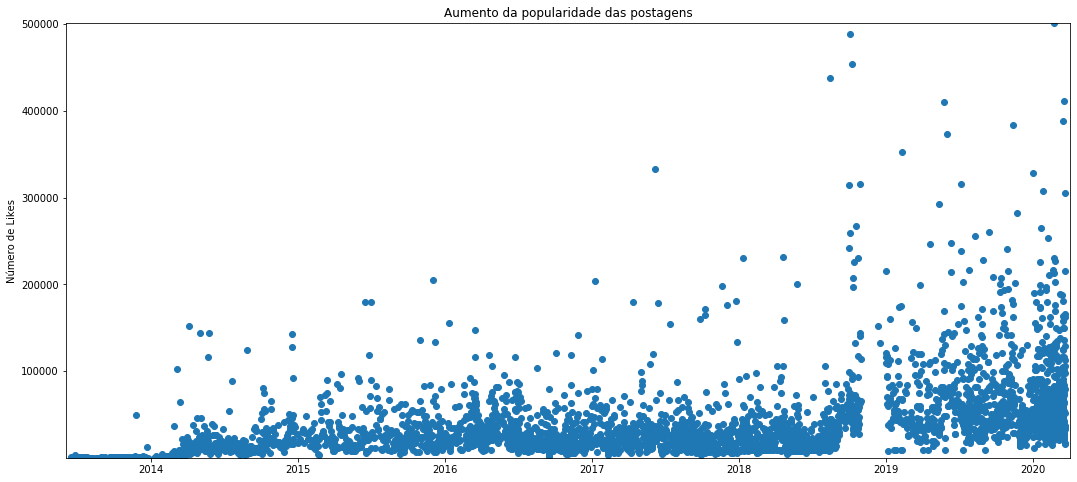

In [7]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [18, 8]
plot(x, y, ax, 'Aumento da popularidade das postagens', 'Número de Likes')

date_time  date_time
2013       6              501.812500
           7              475.923077
           8              293.833333
           9              310.600000
           10             382.344828
                            ...     
2019       11           82456.428571
           12           45977.431373
2020       1            74559.527778
           2            71642.712707
           3            70710.660819
Name: Likes, Length: 82, dtype: float64


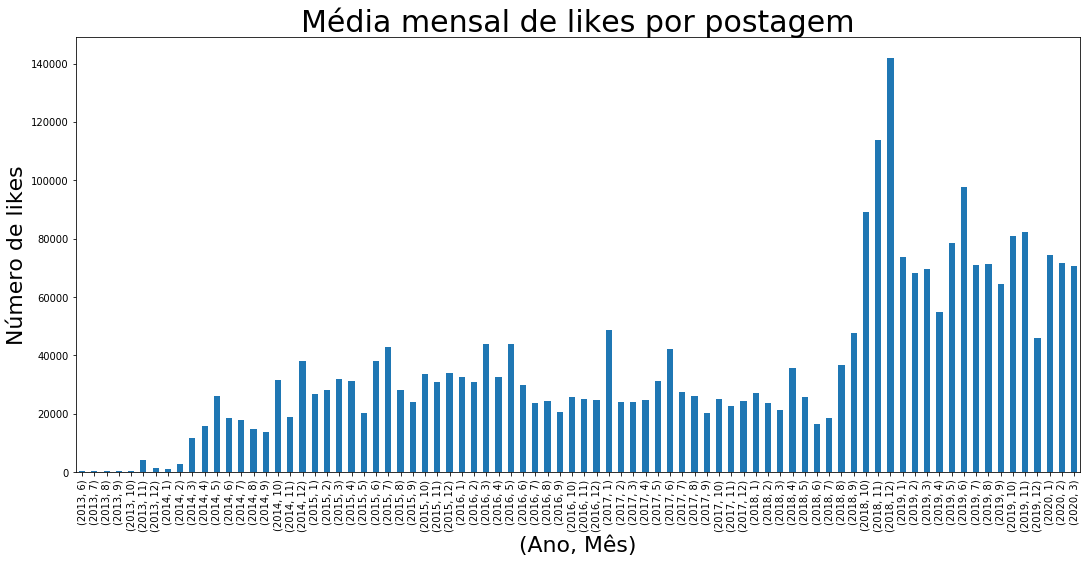

In [8]:
################ Análise da média mensal de likes por postagem ################  
# agrupamento por colunas (similar ao acesso a banco de dados)
# material adicional sobre agrupamento - https://towardsdatascience.com/pandas-groupby-aggregate-transform-filter-c95ba3444bbb
group_by_month = df.groupby([df["date_time"].dt.year, df["date_time"].dt.month])["Likes"].mean()
print(group_by_month)
axes = group_by_month.plot(kind='bar')
#axex = group_by_month[:70].plot(kind='bar') # é possível limitar a quantidade de elementos que será exibida
axes.set_title('Média mensal de likes por postagem',fontsize=30)
axes.set_xlabel('(Ano, Mês)',fontsize=22)
axes.set_ylabel('Número de likes',fontsize=22)
plt.show()

#a figura pode ser salva no diretório que se encontra o notebook
fig = axes.get_figure()
fig.savefig('media_likes.jpg')

0       129465
1        52238
2        97986
3       165539
4       162513
         ...  
3641       362
3642       104
3643       335
3644       216
3645       598
Name: Likes, Length: 3646, dtype: int64


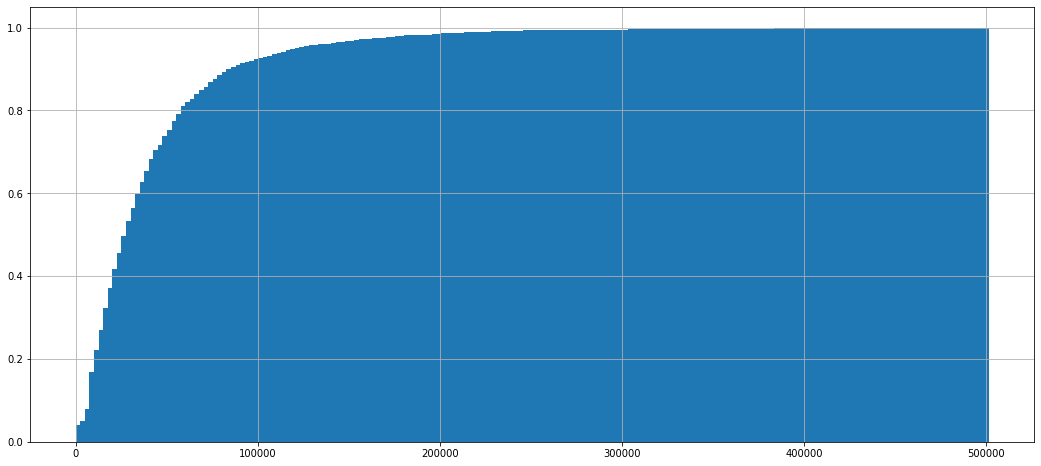

In [9]:
#################### CDF do número de likes #####################
like_series = pd.Series(df['Likes'])
print (like_series)
like_series.hist(cumulative=True, density=1, bins=200)
plt.show()

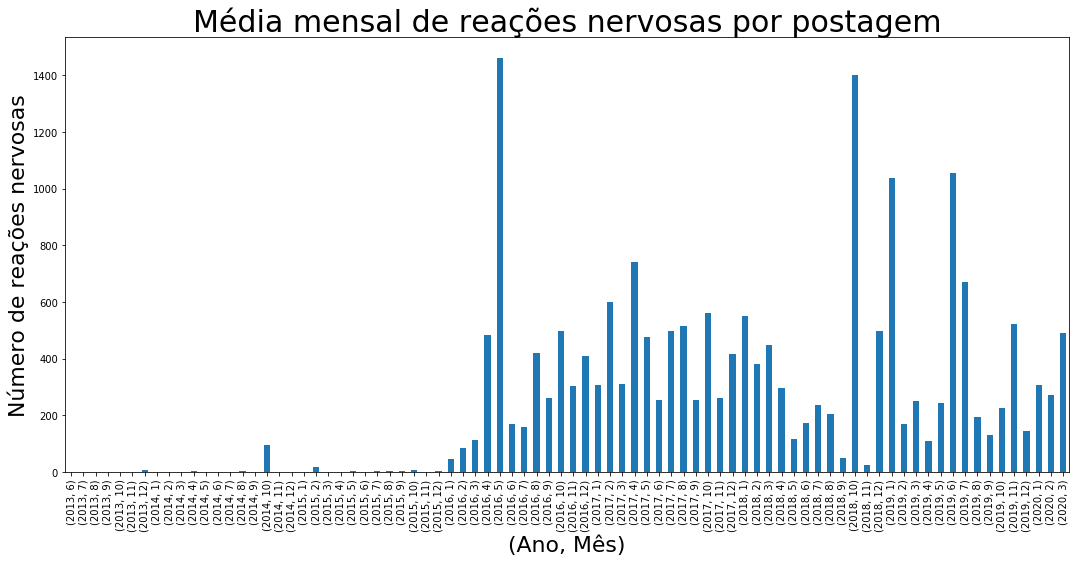

In [10]:
################ Análise da média mensal de reações bravas (angry) por postagem ################  
group_by_month = df.groupby([df["date_time"].dt.year, df["date_time"].dt.month])["Angry"].mean()
axes = group_by_month.plot(kind='bar')
axes.set_title('Média mensal de reações nervosas por postagem',fontsize=30)
axes.set_xlabel('(Ano, Mês)',fontsize=22)
axes.set_ylabel('Número de reações nervosas',fontsize=22)
plt.show()

0       112
1        43
2        65
3        68
4       509
       ... 
3641      0
3642      0
3643      1
3644      0
3645      0
Name: Angry, Length: 3646, dtype: int64


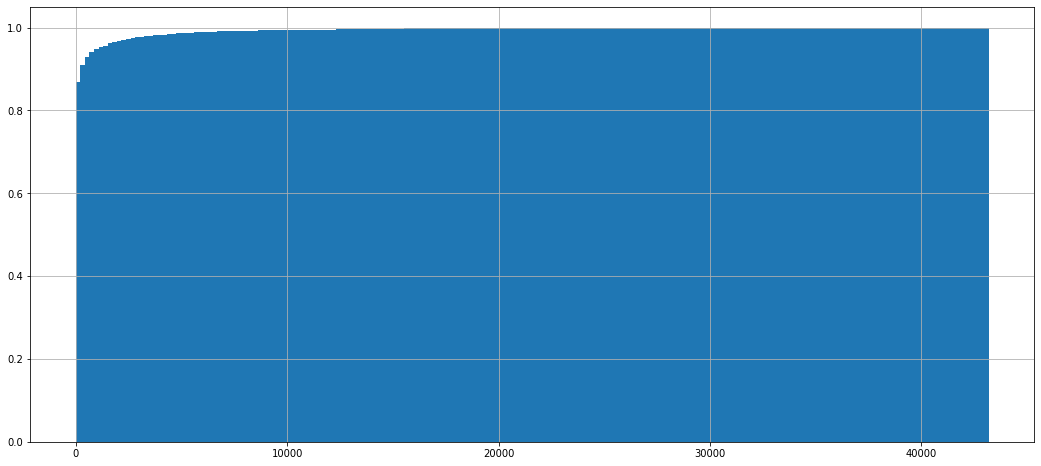

In [11]:
#################### CDF do número de likes #####################
like_series = pd.Series(df['Angry'])
print (like_series)
like_series.hist(cumulative=True, density=1, bins=200)
plt.show()

In [12]:
##################### Análise exploratória - quais postagens com mais reações nervosas? ###################
# carregar novo dataframe com comentários
df_comments = pd.read_csv('posts_details_comments_bolsonaro.tsv', '\t') # le o arquivo - separador é o \t
df_comments.head() # exibe as primeiras 5 linhas do arquivo

,post_id,date,message,num_likes,num_angry,num_shares
0,211857482296579_1826486634166981,2020-03-22T18:47:55+0000,"- Agora, por v\u00eddeoconfer\u00eancia, o Pre...",129465,112,23151
1,211857482296579_1826339070848404,2020-03-22T16:30:39+0000,- As inscri\u00e7\u00f5es para a sele\u00e7\u0...,52238,43,5703
2,211857482296579_1826130007535977,2020-03-22T13:37:26+0000,- Estamos no Minist\u00e9rio da Sa\u00fade com...,97986,65,11818
3,211857482296579_1825937284221916,2020-03-22T11:07:01+0000,- O Governo Federal distribui milh\u00f5es de ...,165539,68,39284
4,211857482296579_1825422034273441,2020-03-22T02:06:48+0000,- Isso se chama precau\u00e7\u00e3o. O medicam...,162513,509,27236


In [13]:
sorted_df = df_comments.sort_values('num_angry', ascending=False)
sorted_df.head(20)

,post_id,date,message,num_likes,num_angry,num_shares
116,211857482296579_1808073599341618,2020-03-09T21:00:01+0000,- Enquanto a Globo tratava um criminoso como v...,188400,43192,60604
1140,211857482296579_599405457128860,2018-10-14T00:43:54+0000,Esta amea\u00e7a vai ser transmitida pela m\u0...,59064,21238,56075
882,211857482296579_1496893443792970,2019-06-22T12:02:55+0000,- Marginais que executaram o Sgt Lu\u00eds Car...,27704,20816,19670
594,211857482296579_1658195387662774,2019-11-08T22:21:34+0000,Globo news nos cita como ex-presidente! Muitos...,47533,20233,12269
231,211857482296579_1786512408164404,2020-02-20T21:22:27+0000,- A Globo bota a culpa em Jair Bolsonaro pelo...,40835,20086,13008
103,211857482296579_1810857175729927,2020-03-12T10:43:06+0000,- O Congresso derrubou nosso veto e ampliou o ...,44701,19269,7907
2109,211857482296579_829211047227883,2017-04-28T11:58:25+0000,- A CUT usando seus m\u00e9todos \democr\u00e...,49552,17103,144501
1829,211857482296579_933228986826088,2017-10-14T17:30:47+0000,- Em 2010 levantei-me contra isso.\n- Qual a s...,13643,15718,14526
1149,211857482296579_347058056038010,2018-10-11T13:07:31+0000,Assista e tire suas conclus\u00f5es:,27288,15463,31554
1125,211857482296579_482174522271315,2018-10-17T23:57:56+0000,\u202aHaddad amea\u00e7a a justi\u00e7a e o po...,49536,15040,34902


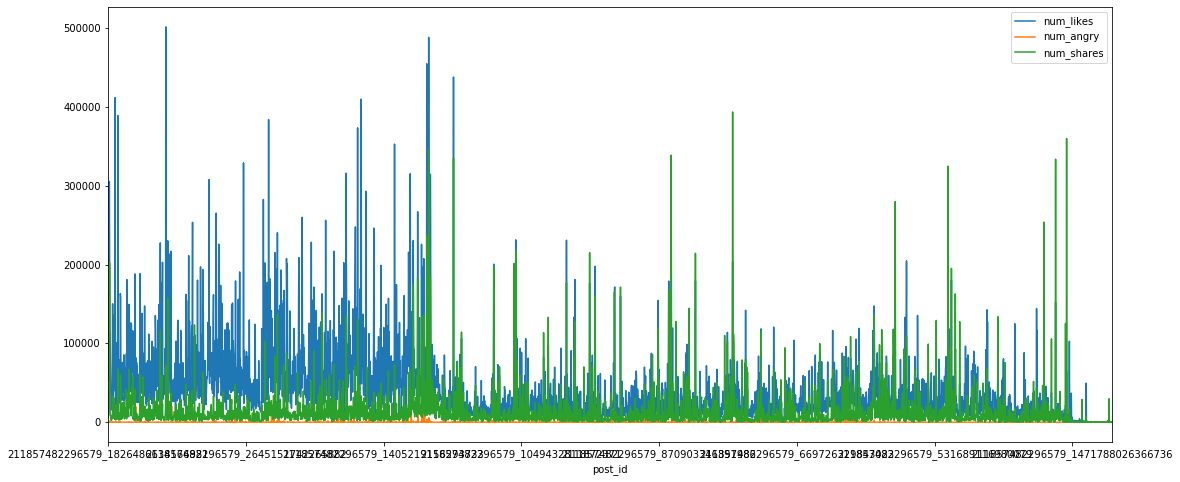

In [14]:
#formato simplificado para plotar série temporal
series = pd.read_csv('posts_details.tsv','\t', header=0, index_col=0, parse_dates=True, squeeze=True)
series.plot()
plt.show()